# Check dataflow

Example codes to visually check:
- data augmentations
- data batching

In [1]:
# https://ipython.org/ipython-doc/3/config/extensions/autoreload.html
%load_ext autoreload
%autoreload 2

In [2]:
import os, sys
import torch
import torchvision

import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

os.environ['CIFAR10_ROOT'] = '/media/user/fast_storage/tensorpack_data/cifar10_data/'
sys.path.append("..")

CIFAR10_ROOT = os.environ['CIFAR10_ROOT']

In [3]:
train_ds = torchvision.datasets.CIFAR10(root=CIFAR10_ROOT, train=True, download=False)

Simple data visualization

In [5]:
from common_utils.dataflow_visu_utils import display_basic_dataset

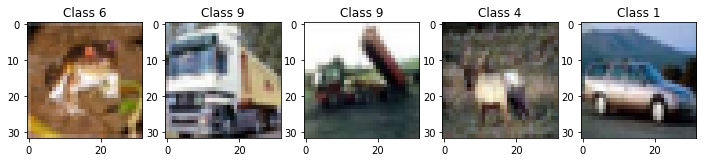

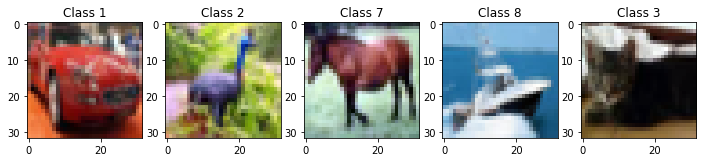

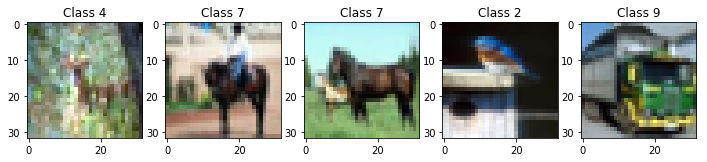

In [6]:
display_basic_dataset(train_ds, max_datapoints=15)

## Setup and check data augmentations

In [7]:
from torchvision.transforms import Compose, Normalize, ToTensor, Lambda
from common_utils.dataflow import TransformedDataset
from common_utils.imgaug import ToNumpy, RandomOrder, RandomChoice, RandomFlip
from common_utils.imgaug import RandomAffine, RandomAdd, RandomCrop, ColorJitter, CenterCrop
from common_utils.imgaug import Brightness, Contrast, Saturation
from common_utils.imgaug import restore_transform

Restore a transform from json string

In [8]:
transforms_json_str = '''{"Compose":
                            {"transforms": [{"ToNumpy": {}},
                                            {"RandomChoice": {"transforms": [
                                                {"RandomAffine": {"translate": [0.05, 0.05],
                                                                    "rotation": [-60, 60],
                                                                    "scale": [0.95, 1.05]}},
                                                {"RandomFlip": {"mode": "h", "proba": 0.5}},
                                                {"RandomFlip": {"mode": "v", "proba": 0.5}}]}},
                                            {"ToTensor": {}},
                                            {"ColorJitter": {"brightness": 0.4, 
                                                             "contrast": 0.4, 
                                                             "saturation": 0.4}},
                                            {"Normalize": {"std": [0.229, 0.224, 0.225],
                                                           "mean": [0.485, 0.456, 0.406]}}
                                            ]
                            }
                        }'''


custom_transforms = {
    "ToNumpy": ToNumpy,    
    "RandomCrop": RandomCrop,
    "CenterCrop": CenterCrop,
    "RandomChoice": RandomChoice,
    "RandomAffine": RandomAffine,
    "RandomFlip": RandomFlip,
    "ColorJitter": ColorJitter,
    "Brightness": Brightness,
    "Contrast": Contrast,    
}

In [9]:
train_transforms = restore_transform(transforms_json_str, custom_transforms)

In [10]:
train_transforms.transforms

In [11]:
aug_train_ds = TransformedDataset(train_ds, x_transforms=train_transforms)

In [12]:
from common_utils.dataflow_visu_utils import display_data_augmentations

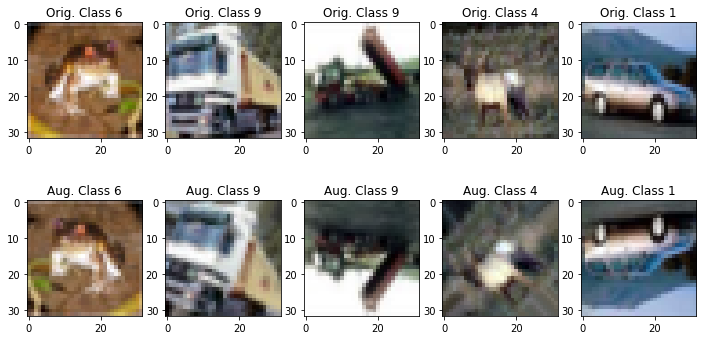

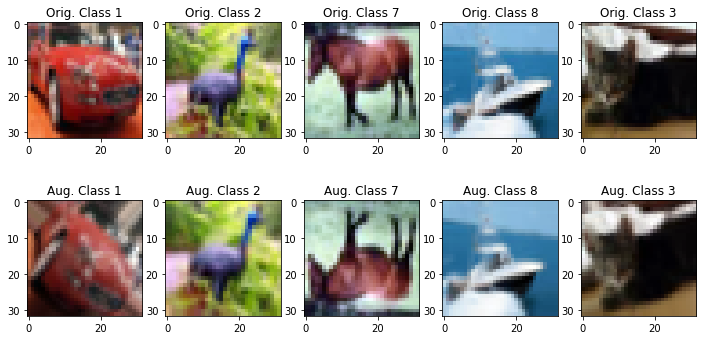

In [13]:
display_data_augmentations(train_ds, aug_train_ds, max_datapoints=10)

## Setup and check complete dataflow : augmentations and batching

In [15]:
from common_utils.dataflow_visu_utils import display_batches
from torch.utils.data import DataLoader

In [16]:
train_batches = DataLoader(aug_train_ds, batch_size=5, drop_last=True, num_workers=2)

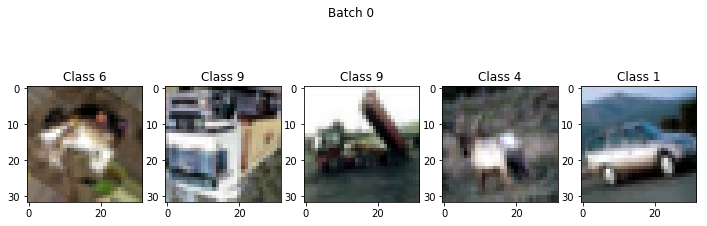

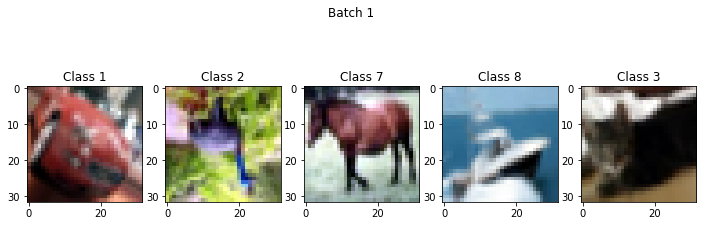

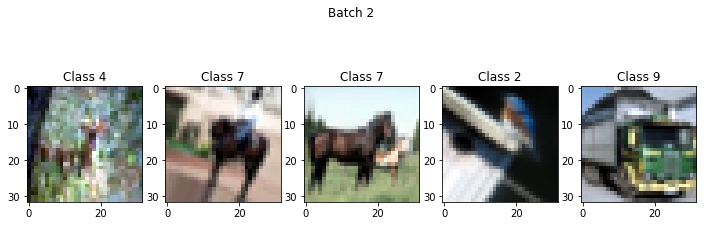

In [17]:
display_batches(train_batches, max_batches=3)